# ANN on Mnist Dataset

In [1]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch import nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import Dataset,DataLoader

In [2]:
device=torch.device('cuda'if torch.cuda.is_available() else 'cpu')
print(f"using device : {device}")

using device : cuda


In [3]:
df=pd.read_csv('mnist_train.csv')

In [4]:
df.sample(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
34028,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52938,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43446,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58315,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(60000, 785)

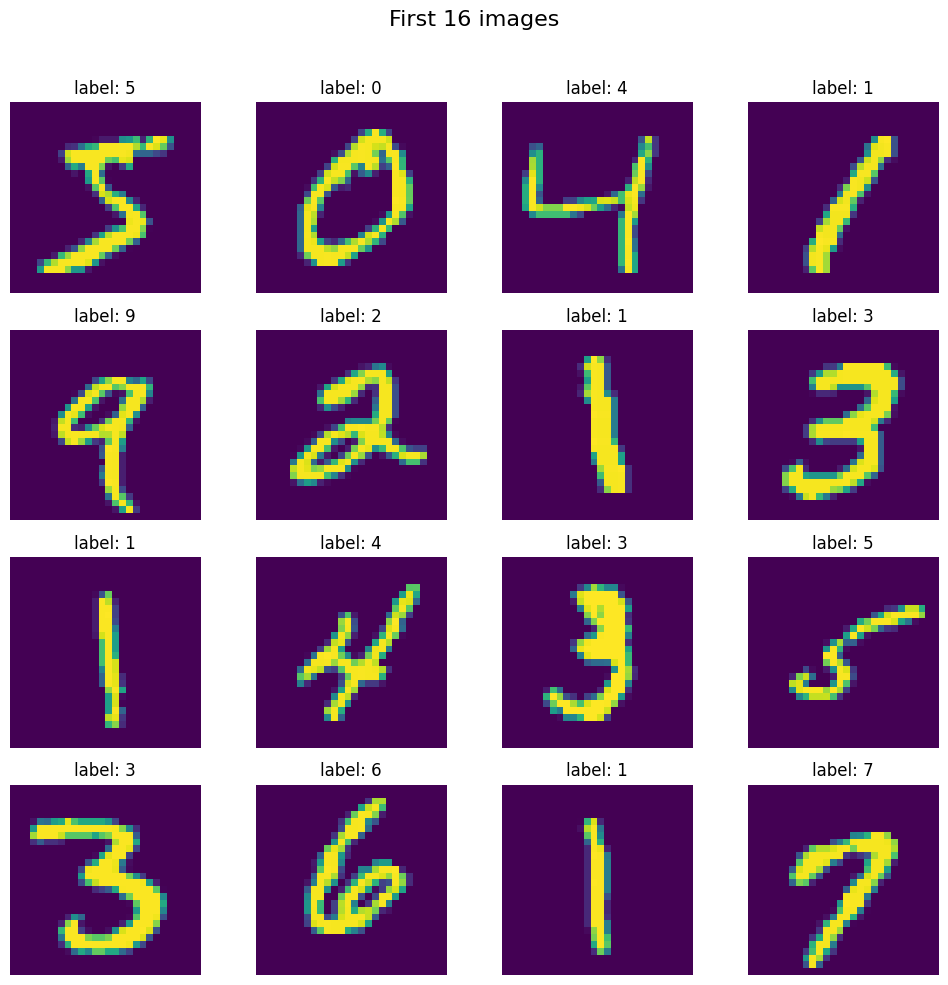

In [6]:
fig,axes=plt.subplots(4,4,figsize=(10,10))
fig.suptitle("First 16 images",fontsize=16)
for i,ax in enumerate(axes.flat):
    img=df.iloc[i,1:].values.reshape(28,28)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"label: {df.iloc[i,0]}")

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

In [7]:
X=df.iloc[:,1:].values
y=df.iloc[:,0].values

In [8]:
y

array([5, 0, 4, ..., 5, 6, 8])

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
X_train=X_train/255
X_test=X_test/255

In [11]:
class CustomDataset(Dataset):

  def __init__(self,features,labels) -> None:
     self.features=torch.tensor(features,dtype=torch.float32)
     self.labels=torch.tensor(labels,dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self,index):
    return self.features[index],self.labels[index]


In [12]:
train_dataset=CustomDataset(X_train,y_train)

In [13]:
len(train_dataset)

48000

In [14]:
test_dataset=CustomDataset(X_test,y_test)

In [15]:
train_loader=DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=32,shuffle=False)

In [16]:
class MyNN(nn.Module):

  def __init__(self,num_features):
    super().__init__()
    self.model=nn.Sequential(
        nn.Linear(num_features,128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(p=0.3),
        nn.Linear(128,64),
        nn.BatchNorm1d(64),
        nn.ReLU(),
        nn.Dropout(p=0.3),
        nn.Linear(64,10)
    )

  def forward(self,x):
    return self.model(x)

In [17]:
epochs=100
learning_rate=0.01

In [18]:
model=MyNN(X_train.shape[1])
model.to(device)

criterian=nn.CrossEntropyLoss()

optimizer=optim.SGD(model.parameters(),lr=learning_rate,weight_decay=1e-4)

In [19]:
for epoch in range(epochs):
  total_epoch_loss=0
  for batch_features,batch_labels in train_loader:
    #move data to gpu
    batch_features=batch_features.to(device)
    batch_labels=batch_labels.to(device)

    #forward pass
    outputs=model(batch_features)

    #cal loss
    loss=criterian(outputs,batch_labels)

    #back pass
    optimizer.zero_grad()
    loss.backward()
    #update grad
    optimizer.step()

    total_epoch_loss+=loss.item()

  print(f"Epoch {epoch+1}/{epochs}, Loss: {total_epoch_loss/len(train_loader)}")

Epoch 1/100, Loss: 0.7042660562892755
Epoch 2/100, Loss: 0.373896260942022
Epoch 3/100, Loss: 0.31120705270270504
Epoch 4/100, Loss: 0.27502992034703494
Epoch 5/100, Loss: 0.24941209259380898
Epoch 6/100, Loss: 0.2297506001976629
Epoch 7/100, Loss: 0.22148784340918065
Epoch 8/100, Loss: 0.20946457321320971
Epoch 9/100, Loss: 0.1989438683502376
Epoch 10/100, Loss: 0.1902242602594197
Epoch 11/100, Loss: 0.17845081047713757
Epoch 12/100, Loss: 0.17714504058721164
Epoch 13/100, Loss: 0.1710000382978469
Epoch 14/100, Loss: 0.16290547638076047
Epoch 15/100, Loss: 0.159082096931835
Epoch 16/100, Loss: 0.15706015071831644
Epoch 17/100, Loss: 0.15386810401330392
Epoch 18/100, Loss: 0.14710518551804125
Epoch 19/100, Loss: 0.14695019991369918
Epoch 20/100, Loss: 0.14441066980641334
Epoch 21/100, Loss: 0.13711788731409857
Epoch 22/100, Loss: 0.13491291042262069
Epoch 23/100, Loss: 0.13414237298785398
Epoch 24/100, Loss: 0.13054322298026333
Epoch 25/100, Loss: 0.12813311491937687
Epoch 26/100, Loss

In [20]:
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [21]:
#evalution on testing data
total=0
correct=0

with torch.no_grad():
  for batch_features,batch_labels in test_loader:
    batch_features=batch_features.to(device)
    batch_labels=batch_labels.to(device)

    outputs=model(batch_features)

    _, predicted= torch.max(outputs,1)

    total=total +batch_labels.shape[0]

    correct=correct + (predicted==batch_labels).sum().item()
print(correct/total)

0.98175


In [22]:
#evalution on traning data to check if overfitting
total=0
correct=0

with torch.no_grad():
  for batch_features,batch_labels in train_loader:
    batch_features=batch_features.to(device)
    batch_labels=batch_labels.to(device)

    outputs=model(batch_features)

    _, predicted= torch.max(outputs,1)

    total=total +batch_labels.shape[0]

    correct=correct + (predicted==batch_labels).sum().item()
print(correct/total)

0.9983541666666667
